In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline 

In [2]:
train_merge = pd.read_csv("train_merge.csv")

/Users/yiranxu/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train_merge.columns

Index(['userID', 'itemID', 'rating', 'label'], dtype='object')

In [4]:
track=train_merge[train_merge['label']=='track']
track.head()

,userID,itemID,rating,label
5910,176831,100296,30,track
5911,183126,100296,0,track
5912,189019,100296,0,track
5913,191122,100296,50,track
5914,192757,100296,30,track


In [5]:
track.rating = track.rating.astype(int)

/Users/yiranxu/anaconda/lib/python3.5/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [6]:
track.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27167857 entries, 5910 to 61944605
Data columns (total 4 columns):
userID    object
itemID    object
rating    int64
label     object
dtypes: int64(1), object(3)
memory usage: 1.0+ GB


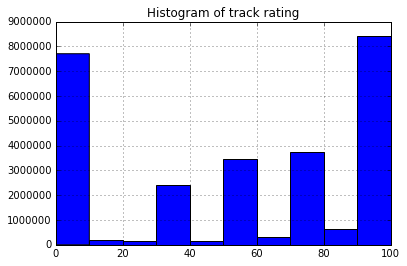

In [13]:
plt.figure()
hist_inc = track['rating'].hist()
plt.title('Histogram of track rating')
plt.savefig("hist_track_rating.jpeg")
plt.show()

In [7]:
#train_merge.rating = train_merge.rating.astype(int)
#there are 200 records where rating is "rating"
train_merge=train_merge[train_merge['rating']!='rating']
#train_merge.value_counts

In [8]:
#check
train_merge[train_merge['rating']=='rating']

,userID,itemID,rating,label


In [17]:
train_merge['rating'].value_counts()

0      10381110
90     10250892
0       7932206
90      6856283
50      3971842
70      3788267
30      3015953
50      3011603
70      2881402
30      2288816
100     1617169
80      1349161
100     1218611
80       777261
60       225636
10       196640
60       172075
10       139414
40       121229
20       117666
40        93109
20        89393
85        45150
85        34656
83        32155
75        31647
87        30424
92        28736
89        27463
81        27307
         ...   
22         2182
51         2145
53         2139
47         2113
18         2043
9          1923
42         1895
38         1830
29         1826
31         1813
33         1774
11         1771
46         1764
53         1754
7          1745
49         1709
27         1699
22         1594
51         1539
38         1459
31         1451
44         1441
9          1435
33         1429
7          1413
29         1409
11         1396
49         1328
27         1309
44         1156
Name: rating, dtype: int

In [18]:
train_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61944406 entries, 0 to 61944605
Data columns (total 4 columns):
userID    object
itemID    object
rating    object
label     object
dtypes: object(4)
memory usage: 2.3+ GB


In [9]:
train_merge['rating'] = train_merge['rating'] .astype(int)

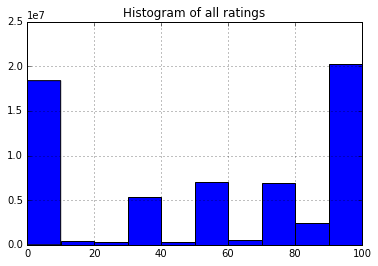

In [34]:
plt.figure()
hist_inc = train_merge['rating'].hist()
plt.title('Histogram of all ratings')
plt.savefig("hist_all_rating.jpeg")
plt.show()

To fit logistic regression model, we need to bin "rating" variable. The cutting points are based on histogram:[0:20] is "Very_Low",[21,40] is "Low", [41,60] is "Okay",
[61,80] is "Good",[81:100] is "Very_Good".

In [10]:
bins = [0, 20, 40, 60, 80,100]
group_names = ['1', '2', '3', '4','5']
categories = pd.cut(train_merge['rating'], bins, labels=group_names,include_lowest=True,right=True)
#train_merge['rating_categories'] = pd.cut(train_merge['rating'], bins, labels=group_names)


In [11]:
train_merge['rating_categories']=categories

In [12]:
train_merge[train_merge['rating']==40]['rating_categories'].value_counts()

2    214338
5         0
4         0
3         0
1         0
Name: rating_categories, dtype: int64

In [22]:
train_merge.describe()

,rating
count,6.194441e+07
mean,5.015647e+01
std,3.794629e+01
min,0.000000e+00
25%,0.000000e+00
50%,5.000000e+01
75%,9.000000e+01
max,1.000000e+02


In [13]:
train_merge.head()

,userID,itemID,rating,label,rating_categories
0,172295,100007,0,artist,1
1,172305,100007,90,artist,5
2,172362,100007,90,artist,5
3,172416,100007,70,artist,4
4,172483,100007,90,artist,5


In [14]:
train_merge.to_csv('train_merge_clean_and_bin406.csv',encoding='utf-8',index=False)

In [15]:
#check
train_merge2 = pd.read_csv("train_merge_clean_and_bin406.csv")

In [16]:
train_merge2.head()

,userID,itemID,rating,label,rating_categories
0,172295,100007,0,artist,1
1,172305,100007,90,artist,5
2,172362,100007,90,artist,5
3,172416,100007,70,artist,4
4,172483,100007,90,artist,5


In [17]:
train_merge.head()

,userID,itemID,rating,label,rating_categories
0,172295,100007,0,artist,1
1,172305,100007,90,artist,5
2,172362,100007,90,artist,5
3,172416,100007,70,artist,4
4,172483,100007,90,artist,5


In [18]:
train_merge['itemID']==507696

0           False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
            ...  
61944576    False
61944577    False
61944578    False
61944579    False
61944580    False
61944581    False
61944582    False
61944583    False
61944584    False
61944585    False
61944586    False
61944587    False
61944588    False
61944589    False
61944590    False
61944591    False
61944592    False
61944593    False
61944594    False
61944595    False
61944596    False
61944597    False
61944598    False
61944599    False
61944600  